In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
from arch import arch_model

plt.style.use('bmh')

In [2]:
assets = ['GOOG', 'MSFT', 'AAPL']
N = len(assets)

data = yf.download(assets, period='5y', interval='1d', auto_adjust=True)

[*********************100%***********************]  3 of 3 completed


In [3]:
data.Close

,AAPL,GOOG,MSFT
Date,,,
2017-03-16,33.208466,848.780029,60.340454
2017-03-17,33.043240,852.119995,60.555161
2017-03-20,33.390217,848.400024,60.611160
2017-03-21,33.007828,830.460022,59.939068
2017-03-22,33.380779,829.590027,60.704521
...,...,...,...
2022-03-09,162.949997,2677.320068,288.500000
2022-03-10,158.520004,2653.639893,285.589996
2022-03-11,154.729996,2609.510010,280.070007


In [4]:
# returns in percentage (%)
returns = 100 * np.log(data.Close / data.Close.shift(1)).dropna()
returns

,AAPL,GOOG,MSFT
Date,,,
2017-03-17,-0.498784,0.392730,0.355193
2017-03-20,1.044595,-0.437510,0.092435
2017-03-21,-1.151821,-2.137246,-1.115053
2017-03-22,1.123553,-0.104816,1.268967
2017-03-23,-0.354203,-1.458286,-0.246349
...,...,...,...
2022-03-09,3.439894,5.046170,4.483782
2022-03-10,-2.756259,-0.888408,-1.013788
2022-03-11,-2.419916,-1.676977,-1.951760


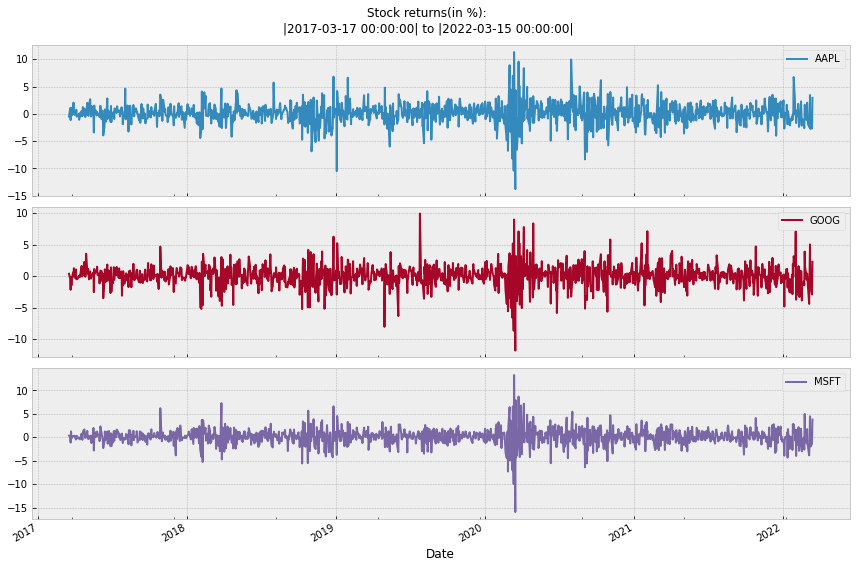

In [5]:
returns.plot(subplots=True, figsize=(12,8), 
             title=f'Stock returns(in %): \n|{returns.index[0]}| to |{returns.index[-1]}|')
plt.tight_layout()
plt.show()

In [6]:
# fit univariate GARCH to each stock
coeffs = []
cond_vol = []
std_resids = []
models = []

for asset in returns.columns:
    model = arch_model(returns[asset], mean='Constant', vol='GARCH', p=1, o=0, q=1)
    fitted = model.fit()
    coeffs.append(fitted.params)
    cond_vol.append(fitted.conditional_volatility)
    std_resids.append(fitted.resid / fitted.conditional_volatility)
    models.append(fitted)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7461.196949167834
Iteration:      2,   Func. Count:     16,   Neg. LLF: 246976396999.83557
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2928.9462354316083
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2914.855566407514
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2451.3771365826033
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2451.0099503088013
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2451.008974420676
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2451.008853962968
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2451.0088404177504
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2451.0088394732757
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2451.0088394732757
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6983.47290

In [7]:
coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
coeffs_df

,mu,omega,alpha[1],beta[1]
AAPL,0.197807,0.146927,0.129840,0.832949
GOOG,0.116278,0.145092,0.072955,0.877304
MSFT,0.164216,0.155001,0.170543,0.776539


In [8]:
cond_vol_df = pd.DataFrame(np.transpose(cond_vol), columns=returns.columns, index=returns.index)
cond_vol_df

,AAPL,GOOG,MSFT
Date,,,
2017-03-17,0.931927,1.003630,0.739538
2017-03-20,0.966094,1.017031,0.765456
2017-03-21,1.008688,1.036778,0.781583
2017-03-22,1.109467,1.207729,0.953134
2017-03-23,1.132913,1.195116,1.033732
...,...,...,...
2022-03-09,1.803753,2.002095,2.223149
2022-03-10,2.054682,2.331258,2.678629
2022-03-11,2.190081,2.233086,2.442001


In [9]:
std_resids_df = pd.DataFrame(np.transpose(std_resids), columns=returns.columns, index=returns.index)
std_resids_df

,AAPL,GOOG,MSFT
Date,,,
2017-03-17,-0.747473,0.275452,0.258239
2017-03-20,0.876508,-0.544515,-0.093776
2017-03-21,-1.338003,-2.173585,-1.636767
2017-03-22,0.834406,-0.183066,1.159073
2017-03-23,-0.487249,-1.317499,-0.397167
...,...,...,...
2022-03-09,1.797412,2.462366,1.942995
2022-03-10,-1.437724,-0.430963,-0.439779
2022-03-11,-1.195263,-0.803039,-0.866493


In [10]:
# constant conditional correlation matrix (R)
R = std_resids_df.transpose().dot(std_resids_df).div(len(std_resids_df))
R 

,AAPL,GOOG,MSFT
AAPL,0.999248,0.586142,0.628029
GOOG,0.586142,0.999415,0.705211
MSFT,0.628029,0.705211,0.999279


In [11]:
# one-step-ahead forecast of the conditional covariance matrix
diag = []
D = np.zeros((N, N))

for model in models:
    diag.append(model.forecast(horizon=1, reindex=False).variance.iloc[-1, 0])
    
diag = np.sqrt(diag)
np.fill_diagonal(D, diag)
print(D)

H = np.matmul(np.matmul(D, R.values), D)
H = pd.DataFrame(H, index=R.index, columns=R.columns)
H

[[2.37256698 0.         0.        ]
 [0.         2.20371008 0.        ]
 [0.         0.         2.48256973]]


,AAPL,GOOG,MSFT
AAPL,5.624844,3.064614,3.699129
GOOG,3.064614,4.853497,3.858115
MSFT,3.699129,3.858115,6.158712
